# Gather

## Packages

In [251]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
from datetime import datetime
import ggplot
from ggplot import *

## Import 'twitter_archive' dataset

In [252]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


## Import 'image_prediction' dataset

In [253]:
# folder_name = 'image_prediction'
# if not os.path.exists(folder_name):
#     os.makedirs(folder_name)
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# response = requests.get(url)
# with open (os.path.join(folder_name, url.split("/")[-1]),mode = 'wb') as file:
#     file.write(response.content)
image_predictions = pd.read_csv('image_prediction/image-predictions.tsv', delimiter = '\t',encoding = 'utf-8')

## Import 'twitter API' dataset

### Connect twitter API and write data to file

In [254]:
# consumer_key = 'xxxxxxxx'
# consumer_secret = 'xxxxxxxx'
# access_token = 'xxxxxxxx'
# access_secret = 'xxxxxxxx'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

# text_file = open("tweet_json.txt", "w")

# error_id = []
# for id in twitter_archive['tweet_id']:
#     try:
#         tweet = api.get_status(id, tweet_mode='extended')
#         json.dump(tweet._json, text_file)
#         text_file.write('\n')
#     except tweepy.TweepError as e:
#         print("id:", id, "error:", e)
#         error_id.append(id)

# text_file.close()

### Import data to pandas dataframe

In [255]:
tweets_data = []
tweets_path = 'tweet_json.txt'
file = open(tweets_path)
for line in file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except Exceptions as e:
        print(e)
        continue

tweet = pd.DataFrame(tweets_data)
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2349 non-null object
display_text_range               2349 non-null object
entities                         2349 non-null object
extended_entities                2070 non-null object
favorite_count                   2349 non-null int64
favorited                        2349 non-null bool
full_text                        2349 non-null object
geo                              0 non-null object
id                               2349 non-null int64
id_str                           2349 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

### Subset data

In [256]:
tweet_data = tweet.filter(['id_str', 'favorite_count', 'retweet_count'])
tweet_data.head(5)

,id_str,favorite_count,retweet_count
0,892420643555336193,39253,8762
1,892177421306343426,33618,6422
2,891815181378084864,25329,4265
3,891689557279858688,42614,8854
4,891327558926688256,40784,9635


# Assess

In [257]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [258]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [259]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [260]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [261]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [262]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [263]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [264]:
tweet_data

,id_str,favorite_count,retweet_count
0,892420643555336193,39253,8762
1,892177421306343426,33618,6422
2,891815181378084864,25329,4265
3,891689557279858688,42614,8854
4,891327558926688256,40784,9635
5,891087950875897856,20447,3207
6,890971913173991426,11995,2124
7,890729181411237888,66332,19389
8,890609185150312448,28067,4363
9,890240255349198849,32308,7608


In [265]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 3 columns):
id_str            2349 non-null object
favorite_count    2349 non-null int64
retweet_count     2349 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.1+ KB


In [266]:
tweet_data.describe()

,favorite_count,retweet_count
count,2349.000000,2349.000000
mean,8104.671350,3092.144317
std,12067.813637,5128.756139
min,0.000000,0.000000
25%,1413.000000,615.000000
50%,3581.000000,1441.000000
75%,10088.000000,3595.000000
max,131571.000000,78616.000000


### Quality

##### `twitter_archive` table
- Some entries in the column of rating_denominator have value not equal to 10
- Weird numbers in the column of rating_numerator(9.75 to 75, 99/90 to 99, ...)
- There are invalid values in column of name (such, an, ...)
- There are retweets data in the table
- Erroneous datatypes(retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_status_user_id, timestamp, retweeted_status_timestamp, id)
- Some rows contain two stages of the dog
- There are some data from other website of which the expand_url is not www.twitter.com

##### `image_prediction` table
- Erroneous datatypes(id)

### Tidiness

- One variable in four columns in `twitter_archive` table (dog stage is one variable)
- `Tweet_data` table cannot be a seperate table

# Clean

In [267]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

## Quality

###  `twitter_archive`: Some entries in the column of rating_denominator have value not equal to 10

#### Define

set all entries in the column of rating_denominator equal to 10

#### Code

In [268]:
twitter_archive_clean.loc[:,'rating_denominator'] = 10

#### Test

In [269]:
twitter_archive_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

###  `twitter_archive`: Weird numbers in the column of rating_numerator

#### Define

re-extract the number from the text using regex, and re-calculate the score with denominator 10. Then, re-write the new score to the column.

#### Code

In [270]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype('float')

In [271]:
def extract_score(dog):
    pattern = re.compile('(\d{1,4}(\.)?\d{0,4})+\/(\d{1,2})')
    index = 0
    match_result = pattern.search(dog.text, index)
    seperate = match_result.group(0).split('/')
    score = 10*(float(seperate[0])/float(seperate[1]))
    return float('%.2f' % score)

for index in range(len(twitter_archive_clean)):
    try:
        twitter_archive_clean.loc[index, 'rating_numerator'] = extract_score(twitter_archive_clean.iloc[index])
    except Exception as e:
        print(index)
        print(e)

313
float division by zero


In [272]:
twitter_archive_clean.iloc[313].text

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [273]:
twitter_archive_clean.loc[313,'rating_numerator'] = 13.0

#### test

In [274]:
twitter_archive_clean.iloc[313].rating_numerator

13.0

In [275]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      560
11.00      466
10.00      463
13.00      352
9.00       157
8.00       102
14.00       54
7.00        54
5.00        36
6.00        32
3.00        19
4.00        15
2.00        11
1.00         8
110.00       3
420.00       2
9.75         2
120.00       2
8.18         2
0.00         2
15.00        2
11.26        1
13.50        1
17.00        1
1776.00      1
9.50         1
666.00       1
12.50        1
11.27        1
34.29        1
7.33         1
182.00       1
6.36         1
Name: rating_numerator, dtype: int64

###  `twitter_archive`: There are invalid values in column of name (such, an, ...)

#### Define

re-extract the dog name from the text column using regex, and re-write to the column of dog names

#### Code

In [276]:
for index in range(len(twitter_archive_clean)):
    try:
        ## Case 1: Eg - 'This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.'
        if ('This is ' in twitter_archive_clean.iloc[index].text):
            if ((twitter_archive_clean.iloc[index].text.split('This is ')[1][0].isupper())):
                dog_name = twitter_archive_clean.iloc[index].text.split('This is ')[1].split('.')[0].split(' ')[0].split(',')[0]

        ## Case 2: Eg - 'Meet Jax. He enjoys ice cream so much he gets nervous around it.'
        elif  ('Meet ' in twitter_archive_clean.iloc[index].text):
            if ((twitter_archive_clean.iloc[index].text.split('Meet ')[1][0].isupper())):
                dog_name = twitter_archive_clean.iloc[index].text.split('Meet ')[1].split('.')[0].split(' ')[0].split(',')[0]

        ## Case 3: Eg - 'This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly.'
        elif  ('named ' in twitter_archive_clean.iloc[index].text):
            if ((twitter_archive_clean.iloc[index].text.split('named ')[1][0].isupper())):
                dog_name = twitter_archive_clean.iloc[index].text.split('named ')[1].split('.')[0].split(' ')[0].split(',')[0]  

        ## Case 4: Eg - 'This is my dog. Her name is Zoey. She knows I've been rating other dogs.'
        elif  ('name is ' in twitter_archive_clean.iloc[index].text): 
            if ((twitter_archive_clean.iloc[index].text.split('name is ')[1][0].isupper())):
                dog_name = twitter_archive_clean.iloc[index].text.split('name is ')[1].split('.')[0].split(' ')[0].split(',')[0]  

        ## Case 5: Eg - 'Say hello to Quinn. She's quite the goofball. Not even a year old.'
        elif  ('say hello to ' in twitter_archive_clean.iloc[index].text):
            if ((twitter_archive_clean.iloc[index].text.split('say hello to ')[1][0].isupper())):
                dog_name = twitter_archive_clean.iloc[index].text.split('say hello to ')[1].split('.')[0].split(' ')[0].split(',')[0]  

        ## Case 6: Eg - 'Here is George. George took a selfie of his new man bun and that is downright epic'
        elif  ('Here is ' in twitter_archive_clean.iloc[index].text):
            if ((twitter_archive_clean.iloc[index].text.split('Here is ')[1][0].isupper())):
                dog_name = twitter_archive_clean.iloc[index].text.split('Here is ')[1].split('.')[0].split(' ')[0].split(',')[0]  

        else:
            dog_name = "None"
        twitter_archive_clean.loc[index,'name'] = dog_name
    except Exception as e:
        print(e)
        print(index)



In [277]:
twitter_archive_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22       Jeffrey
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326      Walter
2327      Walter
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

In [278]:
## Check every name's format(If the first char is upper case and second char is lower case)
for index in range(len(twitter_archive_clean)):
    if ((twitter_archive_clean.loc[index,'name'][0].isupper) and (twitter_archive_clean.loc[index,'name'][0].islower) == False):
        print(twitter_archive_clean.loc[index,'name'])
        print("Not name")

In [279]:
## Check every name's format(If every name contains only alphabet)
for index in range(len(twitter_archive_clean)):
    if twitter_archive_clean.loc[index,'name'].isalpha() == False:
        print(twitter_archive_clean.loc[index,'name'])

O'Malley
Fred-Rick
Eazy-E


These three names are correct!

In [280]:
twitter_archive_clean.name.value_counts()

None         885
Charlie       11
Tucker        10
Lola          10
Lucy          10
Bo             9
Penny          9
Oliver         9
Cooper         9
Winston        8
Daisy          8
Toby           7
Dave           7
Buddy          7
Bailey         7
Stanley        7
Koda           6
Jax            6
Oscar          6
Scout          6
Louis          6
Sadie          6
Rusty          6
Bella          6
Milo           6
Walter         6
Gus            5
Sammy          5
Zoey           5
Larry          5
            ... 
Goose          1
Bubba          1
Stormy         1
Godzilla       1
Brady          1
Miguel         1
Bloop          1
Sage           1
Spanky         1
Ralpher        1
Ember          1
Grizzwald      1
Bookstore      1
Bronte         1
Oddie          1
Mac            1
Angel          1
Reagan         1
Lizzie         1
Gordon         1
Brian          1
Terrenth       1
Cilantro       1
Rudy           1
Napolean       1
Mona           1
Ralphson       1
Mingus        

###  `twitter_archive`: There are retweets data in the table

#### Define

Subset the table by removing the rows in which the entry of the column of 'retweeted_status_id' is not NaN

#### Code

In [281]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean.reset_index(drop = True)

#### Test

In [282]:
twitter_archive_clean.index

RangeIndex(start=0, stop=2175, step=1)

In [283]:
sum(twitter_archive_clean.retweeted_status_id.notnull())

0

###  `twitter_archive`: Erroneous datatypes(retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_status_user_id, timestamp, id)

#### Define

Change the datatype by using astype

#### Code

In [284]:
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.astype(str)
twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_user_id.astype(str)
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(str)
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

for index in range(len(twitter_archive_clean)):
    try:
        time = datetime.strptime(twitter_archive_clean.loc[index,'timestamp'][:-6],"%Y-%m-%d %H:%M:%S")
        twitter_archive_clean.loc[index,'timestamp'] = time
    except Exception as e:
        print(index)
        print(e)

#### Test

In [285]:
twitter_archive_clean.timestamp

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
5       2017-07-29 00:08:17
6       2017-07-28 16:27:12
7       2017-07-28 00:22:40
8       2017-07-27 16:25:51
9       2017-07-26 15:59:51
10      2017-07-26 00:31:25
11      2017-07-25 16:11:53
12      2017-07-25 01:55:32
13      2017-07-25 00:10:02
14      2017-07-24 17:02:04
15      2017-07-24 00:19:32
16      2017-07-23 00:22:39
17      2017-07-22 16:56:37
18      2017-07-22 00:23:06
19      2017-07-20 16:49:33
20      2017-07-19 16:06:48
21      2017-07-19 03:39:09
22      2017-07-19 00:47:34
23      2017-07-18 16:08:03
24      2017-07-18 00:07:08
25      2017-07-17 16:17:36
26      2017-07-16 23:58:41
27      2017-07-16 20:14:00
28      2017-07-15 23:25:31
29      2017-07-15 16:51:35
               ...         
2145    2015-11-17 00:24:19
2146    2015-11-17 00:06:54
2147    2015-11-16 23:23:41
2148    2015-11-16 21:54:18
2149    2015-11-16 2

In [286]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(1), int64(1),

###  `twitter_archive`: Some rows contain two stages of the dog

#### Define

find rows which contain two stages of the dog and explore the text of the row to revise the problem manually


#### Code

In [287]:
twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['floofer'] == 'floofer')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
172,854010172552949760,nan,nan,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",nan,nan,NaN,https://twitter.com/dog_rates/status/854010172...,11.0,10,None,doggo,floofer,None,None


In [288]:
twitter_archive_clean.loc[172,'text']

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [289]:
twitter_archive_clean.loc[172,'doggo'] = 'None'

In [290]:
twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['pupper'] == 'pupper')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
382,817777686764523521,nan,nan,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",nan,nan,NaN,https://twitter.com/dog_rates/status/817777686...,13.0,10,Dido,doggo,None,pupper,None
442,808106460588765185,nan,nan,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,nan,nan,NaN,https://twitter.com/dog_rates/status/808106460...,12.0,10,None,doggo,None,pupper,None
467,802265048156610565,7.33109485276e+17,4196983835.0,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",nan,nan,NaN,https://twitter.com/dog_rates/status/802265048...,11.0,10,None,doggo,None,pupper,None
474,801115127852503040,nan,nan,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,nan,nan,NaN,https://twitter.com/dog_rates/status/801115127...,12.0,10,Bones,doggo,None,pupper,None
567,785639753186217984,nan,nan,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,nan,nan,NaN,https://twitter.com/dog_rates/status/785639753...,10.0,10,Pinot,doggo,None,pupper,None
593,781308096455073793,nan,nan,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",nan,nan,NaN,https://vine.co/v/5rgu2Law2ut,12.0,10,None,doggo,None,pupper,None
722,759793422261743616,nan,nan,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",nan,nan,NaN,https://twitter.com/dog_rates/status/759793422...,12.0,10,Maggie,doggo,None,pupper,None
781,751583847268179968,nan,nan,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/751583847...,5.0,10,None,doggo,None,pupper,None
885,741067306818797568,nan,nan,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,nan,nan,NaN,https://twitter.com/dog_rates/status/741067306...,12.0,10,Ted,doggo,None,pupper,None
935,733109485275860992,nan,nan,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",nan,nan,NaN,https://twitter.com/dog_rates/status/733109485...,12.0,10,None,doggo,None,pupper,None


In [291]:
twitter_archive_clean.loc[382,'text']

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

In [292]:
twitter_archive_clean.loc[382,'doggo'] = 'None'

In [293]:
twitter_archive_clean.loc[442,'text']

'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'

'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho' means there are two dogs in one picture. It does not make any sense to use this picture to be trained to get the machine learning model. So I decide to remove this observation!

In [294]:
twitter_archive_clean = twitter_archive_clean.drop(442)
twitter_archive_clean = twitter_archive_clean.reset_index(drop = True)

In [295]:
twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['pupper'] == 'pupper')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
466,802265048156610565,7.33109485276e+17,4196983835.0,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",nan,nan,NaN,https://twitter.com/dog_rates/status/802265048...,11.0,10,None,doggo,None,pupper,None
473,801115127852503040,nan,nan,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,nan,nan,NaN,https://twitter.com/dog_rates/status/801115127...,12.0,10,Bones,doggo,None,pupper,None
566,785639753186217984,nan,nan,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,nan,nan,NaN,https://twitter.com/dog_rates/status/785639753...,10.0,10,Pinot,doggo,None,pupper,None
592,781308096455073793,nan,nan,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",nan,nan,NaN,https://vine.co/v/5rgu2Law2ut,12.0,10,None,doggo,None,pupper,None
721,759793422261743616,nan,nan,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",nan,nan,NaN,https://twitter.com/dog_rates/status/759793422...,12.0,10,Maggie,doggo,None,pupper,None
780,751583847268179968,nan,nan,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/751583847...,5.0,10,None,doggo,None,pupper,None
884,741067306818797568,nan,nan,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,nan,nan,NaN,https://twitter.com/dog_rates/status/741067306...,12.0,10,Ted,doggo,None,pupper,None
934,733109485275860992,nan,nan,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",nan,nan,NaN,https://twitter.com/dog_rates/status/733109485...,12.0,10,None,doggo,None,pupper,None


In [296]:
twitter_archive_clean.loc[466,'text']

'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze'

Assume it is a doggo

In [297]:
twitter_archive_clean.loc[466,'pupper'] = 'None'

In [298]:
twitter_archive_clean.loc[473,'text']

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

In [299]:
twitter_archive_clean.loc[473,'pupper'] = 'None'

In [300]:
twitter_archive_clean.loc[566,'text']

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

In [301]:
twitter_archive_clean.loc[566,'pupper'] = 'None'

In [302]:
twitter_archive_clean.loc[592,'text']

'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u'

In [303]:
twitter_archive_clean.loc[592,'doggo'] = 'None'

In [304]:
twitter_archive_clean.loc[721,'text']

'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll'

'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll' means there are two dogs in one picture. It does not make any sense to use this picture to be trained to get the machine learning model. So I decide to remove this observation!

In [305]:
twitter_archive_clean = twitter_archive_clean.drop(721)
twitter_archive_clean = twitter_archive_clean.reset_index(drop = True)

In [306]:
twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['pupper'] == 'pupper')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
779,751583847268179968,nan,nan,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/751583847...,5.0,10,None,doggo,None,pupper,None
883,741067306818797568,nan,nan,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,nan,nan,NaN,https://twitter.com/dog_rates/status/741067306...,12.0,10,Ted,doggo,None,pupper,None
933,733109485275860992,nan,nan,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",nan,nan,NaN,https://twitter.com/dog_rates/status/733109485...,12.0,10,None,doggo,None,pupper,None


In [307]:
twitter_archive_clean.loc[779,'text']

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8"

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8" does not make any sense. I decide to remove this row.

In [308]:
twitter_archive_clean = twitter_archive_clean.drop(779)
twitter_archive_clean = twitter_archive_clean.reset_index(drop = True)

In [309]:
twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['pupper'] == 'pupper')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
882,741067306818797568,nan,nan,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,nan,nan,NaN,https://twitter.com/dog_rates/status/741067306...,12.0,10,Ted,doggo,None,pupper,None
932,733109485275860992,nan,nan,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",nan,nan,NaN,https://twitter.com/dog_rates/status/733109485...,12.0,10,None,doggo,None,pupper,None


In [310]:
twitter_archive_clean.loc[882,'text']

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC' does not make sense. I decide to remove this observation.

In [311]:
twitter_archive_clean = twitter_archive_clean.drop(882)
twitter_archive_clean = twitter_archive_clean.reset_index(drop = True)

In [312]:
twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['pupper'] == 'pupper')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
931,733109485275860992,nan,nan,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",nan,nan,NaN,https://twitter.com/dog_rates/status/733109485...,12.0,10,None,doggo,None,pupper,None


In [313]:
twitter_archive_clean.loc[931,'text']

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda' does not make sense. Remove this observation!

In [314]:
twitter_archive_clean = twitter_archive_clean.drop(931)
twitter_archive_clean = twitter_archive_clean.reset_index(drop = True)

In [315]:
twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['pupper'] == 'pupper')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [316]:
twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['puppo'] == 'puppo')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
165,855851453814013952,nan,nan,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,nan,nan,NaN,https://twitter.com/dog_rates/status/855851453...,13.0,10,None,doggo,None,None,puppo


In [317]:
twitter_archive_clean.loc[165,'text']

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [318]:
twitter_archive_clean.loc[165,'doggo'] = 'None'

In [319]:
twitter_archive_clean[(twitter_archive_clean['floofer'] == 'floofer') & (twitter_archive_clean['pupper'] == 'pupper')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [320]:
twitter_archive_clean[(twitter_archive_clean['floofer'] == 'floofer') & (twitter_archive_clean['puppo'] == 'puppo')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [321]:
twitter_archive_clean[(twitter_archive_clean['pupper'] == 'pupper') & (twitter_archive_clean['puppo'] == 'puppo')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Test

In [322]:
twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['floofer'] == 'floofer')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [323]:
twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['pupper'] == 'pupper')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [324]:
twitter_archive_clean[(twitter_archive_clean['doggo'] == 'doggo') & (twitter_archive_clean['puppo'] == 'puppo')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [325]:
twitter_archive_clean[(twitter_archive_clean['floofer'] == 'floofer') & (twitter_archive_clean['pupper'] == 'pupper')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [326]:
twitter_archive_clean[(twitter_archive_clean['floofer'] == 'floofer') & (twitter_archive_clean['puppo'] == 'puppo')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [327]:
twitter_archive_clean[(twitter_archive_clean['pupper'] == 'pupper') & (twitter_archive_clean['puppo'] == 'puppo')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


###  `twitter_archive`: There are some data from other website of which the expand_url is not www.twitter.com

#### Define

remove rows of which the source doesn't contain twitter.com

#### Code

In [328]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,None,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,None,None,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,None,None,None
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,None,None,None
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,None,None,None


In [329]:
row_list = []
for index in range(len(twitter_archive_clean)):
    if 'twitter.com' in twitter_archive_clean.loc[index,'source']:
        row_list.append(index)

twitter_archive_clean = twitter_archive_clean.loc[row_list,:]
twitter_archive_clean = twitter_archive_clean.reset_index(drop = True)

#### Test

In [330]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,None,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,None,None,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,None,None,None
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,None,None,None
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,None,None,None


In [331]:
for index in range(len(twitter_archive_clean)):
    if not 'twitter.com' in twitter_archive_clean.loc[index,'source']:
        print('Wrong')

###  `image_prediction` table: Erroneous datatypes(id)

#### Define

change the datatype using astype

#### Code

In [332]:
image_predictions.tweet_id = image_predictions.tweet_id.astype(str)

#### Test

In [333]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Tidiness

###  `twitter_archive`: One variable in four columns in twitter_archive table (dog stage is one variable)

#### Define

divide the dataset into two sub-dataset. The one contains the observation of which the dog stage is 'None', the other one contains the observation of which there is a dog stage. For the one does not have a stage, delete the last four columns and add a column named 'dog_stage' of which entries are 'None'. For the one has a stage, convert the four columns to one by using function melt(). Finally, concatenate the two dataset and sort the concatenated dataset by tweet_id.

#### Code

In [334]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 17 columns):
tweet_id                      2079 non-null object
in_reply_to_status_id         2079 non-null object
in_reply_to_user_id           2079 non-null object
timestamp                     2079 non-null object
source                        2079 non-null object
text                          2079 non-null object
retweeted_status_id           2079 non-null object
retweeted_status_user_id      2079 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2021 non-null object
rating_numerator              2079 non-null float64
rating_denominator            2079 non-null int64
name                          2079 non-null object
doggo                         2079 non-null object
floofer                       2079 non-null object
pupper                        2079 non-null object
puppo                         2079 non-null object
dtypes: float64(1), int64(1),

In [335]:
nostage_dataset = twitter_archive_clean[(twitter_archive_clean['doggo'] == 'None')&  
                                      (twitter_archive_clean['floofer'] == 'None')& 
                                      (twitter_archive_clean['pupper'] == 'None')& 
                                      (twitter_archive_clean['puppo'] == 'None')]

In [336]:
havestage_dataset = twitter_archive_clean[~((twitter_archive_clean['doggo'] == 'None')&  
                                      (twitter_archive_clean['floofer'] == 'None')& 
                                      (twitter_archive_clean['pupper'] == 'None')& 
                                      (twitter_archive_clean['puppo'] == 'None'))]

In [337]:
melt_stage_dataset = pd.melt(havestage_dataset,   
                       id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id',  
                                'timestamp','source','text','retweeted_status_id',  
                                'retweeted_status_user_id','retweeted_status_timestamp',  
                                'expanded_urls','rating_numerator','rating_denominator','name'],   
                       value_vars= ['doggo','floofer','pupper','puppo'], var_name='dog_stage')

In [338]:
melt_stage_dataset

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,value
0,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,doggo
1,889665388333682689,nan,nan,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,nan,nan,NaN,https://twitter.com/dog_rates/status/889665388...,13.0,10,None,doggo,None
2,889531135344209921,nan,nan,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,nan,nan,NaN,https://twitter.com/dog_rates/status/889531135...,13.0,10,Stuart,doggo,None
3,886366144734445568,nan,nan,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,nan,nan,NaN,https://twitter.com/dog_rates/status/886366144...,12.0,10,Roscoe,doggo,None
4,884162670584377345,nan,nan,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,nan,nan,NaN,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,doggo,doggo
5,883360690899218434,nan,nan,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,nan,nan,NaN,https://twitter.com/dog_rates/status/883360690...,13.0,10,Grizzwald,doggo,None
6,882762694511734784,nan,nan,2017-07-06 00:46:41,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,nan,nan,NaN,https://twitter.com/dog_rates/status/882762694...,12.0,10,Gus,doggo,None
7,881536004380872706,nan,nan,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,nan,nan,NaN,https://twitter.com/dog_rates/status/881536004...,14.0,10,None,doggo,None
8,878776093423087618,nan,nan,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,nan,nan,NaN,https://twitter.com/dog_rates/status/878776093...,13.0,10,Snoopy,doggo,None
9,876838120628539392,nan,nan,2017-06-19 16:24:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,nan,nan,NaN,https://twitter.com/dog_rates/status/876838120...,12.0,10,Ginger,doggo,None


In [339]:
melt_stage_dataset = melt_stage_dataset[melt_stage_dataset['dog_stage'] == melt_stage_dataset['value']]
melt_stage_dataset = melt_stage_dataset.drop('value',axis = 1)

In [340]:
melt_stage_dataset

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo
4,884162670584377345,nan,nan,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,nan,nan,NaN,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,doggo
13,872967104147763200,nan,nan,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,nan,nan,NaN,https://twitter.com/dog_rates/status/872967104...,12.0,10,None,doggo
15,871515927908634625,nan,nan,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,nan,nan,NaN,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,doggo
16,871102520638267392,nan,nan,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,nan,nan,NaN,https://twitter.com/animalcog/status/871075758...,14.0,10,None,doggo
17,869596645499047938,nan,nan,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,nan,nan,NaN,https://twitter.com/dog_rates/status/869596645...,12.0,10,Scout,doggo
21,858843525470990336,nan,nan,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,nan,nan,NaN,https://twitter.com/dog_rates/status/858843525...,13.0,10,None,doggo
26,846514051647705089,nan,nan,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,nan,nan,NaN,https://twitter.com/dog_rates/status/846514051...,13.0,10,Barney,doggo
27,845397057150107648,nan,nan,2017-03-24 22:08:59,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,nan,nan,NaN,"https://www.gofundme.com/help-save-a-pup,https...",13.0,10,None,doggo
31,836753516572119041,nan,nan,2017-03-01 01:42:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,nan,nan,NaN,https://twitter.com/dog_rates/status/836753516...,12.0,10,Meera,doggo


In [341]:
nostage_dataset = nostage_dataset.drop(['doggo','floofer','pupper','puppo'],axis = 1)
nostage_dataset['dog_stage'] = 'None'

In [342]:
nostage_dataset

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None
10,890006608113172480,nan,nan,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,nan,nan,NaN,https://twitter.com/dog_rates/status/890006608...,13.0,10,Koda,None


In [343]:
twitter_archive_clean = pd.concat([nostage_dataset,melt_stage_dataset],axis = 0)
twitter_archive_clean = twitter_archive_clean.sort_values(['tweet_id'],ascending = False).reset_index(drop = True)

#### Test

In [344]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 14 columns):
tweet_id                      2079 non-null object
in_reply_to_status_id         2079 non-null object
in_reply_to_user_id           2079 non-null object
timestamp                     2079 non-null object
source                        2079 non-null object
text                          2079 non-null object
retweeted_status_id           2079 non-null object
retweeted_status_user_id      2079 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2021 non-null object
rating_numerator              2079 non-null float64
rating_denominator            2079 non-null int64
name                          2079 non-null object
dog_stage                     2079 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 227.5+ KB


###  `twitter_data` table: Tweet_data table cannot be a seperate table

#### Define

Extracting 'favorite_count' and 'retweet_count' from the downloaded json data and adding them as column to twitter_archive table.

#### Code

In [355]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 3 columns):
tweet_id          2349 non-null object
favorite_count    2349 non-null int64
retweet_count     2349 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.1+ KB


In [356]:
tweet_data_clean.rename(columns={'id_str':'tweet_id'}, inplace = True)

In [357]:
new_twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_data_clean, on = 'tweet_id', how = 'left')

In [358]:
new_twitter_archive_clean = new_twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id',  
                                                            'retweeted_status_timestamp'],axis = 1)

#### Test

In [365]:
new_twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,39253,8762
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,33618,6422
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,25329,4265
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,42614,8854
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,40784,9635
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,20447,3207
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,11995,2124
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,66332,19389
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,28067,4363
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,32308,7608


In [366]:
len(new_twitter_archive_clean) == len(twitter_archive_clean)

True

In [367]:
sum(new_twitter_archive_clean['retweet_count'].isnull())

0

In [368]:
sum(new_twitter_archive_clean['favorite_count'].isnull())

0

## Cleaned Datasets

new_twitter_archive_clean, image_predictions

In [369]:
new_twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,39253,8762
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,33618,6422
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,25329,4265
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,42614,8854
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,40784,9635
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,20447,3207
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,11995,2124
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,66332,19389
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,28067,4363
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,32308,7608


In [370]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## Storing

In [371]:
new_twitter_archive_clean.to_csv('twitter_archive_master.csv')

In [372]:
image_predictions_clean.to_csv('image_prediction_master.csv')

## Analyzing

#### 1. Tweet with maximum re-tweets

In [373]:
max_pos = new_twitter_archive_clean.retweet_count.argmax() 
new_twitter_archive_clean.iloc[max_pos]

tweet_id                                                744234799360020481
in_reply_to_status_id                                                  nan
in_reply_to_user_id                                                    nan
timestamp                                              2016-06-18 18:26:18
source                   <a href="http://twitter.com/download/iphone" r...
text                     Here's a doggo realizing you can stand in a po...
expanded_urls            https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                        13
rating_denominator                                                      10
name                                                                  None
dog_stage                                                            doggo
favorite_count                                                      129875
retweet_count                                                        78616
Name: 832, dtype: object

#### 2. Tweet with minimum re-tweets

In [374]:
min_pos = new_twitter_archive_clean.retweet_count.argmin() 
new_twitter_archive_clean.iloc[min_pos]

tweet_id                                                838085839343206401
in_reply_to_status_id                                    8.38085539362e+17
in_reply_to_user_id                                           2894131180.0
timestamp                                              2017-03-04 17:56:49
source                   <a href="http://twitter.com/download/iphone" r...
text                     @bragg6of8 @Andy_Pace_ we are still looking fo...
expanded_urls                                                          NaN
rating_numerator                                                        15
rating_denominator                                                      10
name                                                                  None
dog_stage                                                             None
favorite_count                                                         148
retweet_count                                                            0
Name: 247, dtype: object

#### 3. Tweet with maximum like

In [375]:
max_pos = new_twitter_archive_clean.favorite_count.argmax()
new_twitter_archive_clean.iloc[max_pos]

tweet_id                                                822872901745569793
in_reply_to_status_id                                                  nan
in_reply_to_user_id                                                    nan
timestamp                                              2017-01-21 18:26:02
source                   <a href="http://twitter.com/download/iphone" r...
text                     Here's a super supportive puppo participating ...
expanded_urls            https://twitter.com/dog_rates/status/822872901...
rating_numerator                                                        13
rating_denominator                                                      10
name                                                                  None
dog_stage                                                            puppo
favorite_count                                                      131571
retweet_count                                                        47596
Name: 348, dtype: object

#### 4. Tweet with minimum like

In [376]:
min_pos = new_twitter_archive_clean.favorite_count.argmin()
new_twitter_archive_clean.iloc[min_pos]

tweet_id                                                707983188426153984
in_reply_to_status_id                                    7.07980065893e+17
in_reply_to_user_id                                           2319108198.0
timestamp                                              2016-03-10 17:35:20
source                   <a href="http://twitter.com/download/iphone" r...
text                     @serial @MrRoles OH MY GOD I listened to all o...
expanded_urls                                                          NaN
rating_numerator                                                        12
rating_denominator                                                      10
name                                                                  None
dog_stage                                                             None
favorite_count                                                          51
retweet_count                                                            2
Name: 1066, dtype: object

#### 5. The mean value and median value of variables

In [377]:
new_twitter_archive_clean.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2079.000000,2079.0,2079.000000,2079.000000
mean,12.481934,10.0,8769.662338,2693.026455
std,43.697199,0.0,12407.771856,4667.213361
min,0.000000,10.0,51.000000,0.000000
25%,10.000000,10.0,1835.500000,588.000000
50%,11.000000,10.0,3980.000000,1303.000000
75%,12.000000,10.0,11114.500000,3096.500000
max,1776.000000,10.0,131571.000000,78616.000000


#### 6. Prediction accuracy

In [378]:
# Predicition accuracy = Total True cases / Total cases
true_cases = image_predictions_clean.p1_dog.value_counts()[1]
total = len(image_predictions_clean)
accuracy = 100.0 *true_cases/total

print ("Prediction1 Accuracy = ",accuracy,'%')

true_cases = image_predictions_clean.p2_dog.value_counts()[1]
total = len(image_predictions_clean)
accuracy = 100.0 *true_cases/total

print("Prediction2 Accuracy = ",accuracy,'%')

true_cases = image_predictions_clean.p3_dog.value_counts()[1]
total = len(image_predictions_clean)
accuracy = 100.0 *true_cases/total

print("Prediction3 Accuracy = ", accuracy,'%')

Prediction1 Accuracy =  73.8313253012 %
Prediction2 Accuracy =  74.843373494 %
Prediction3 Accuracy =  72.2409638554 %


## Visualization

#### 1. Trends of likes on time

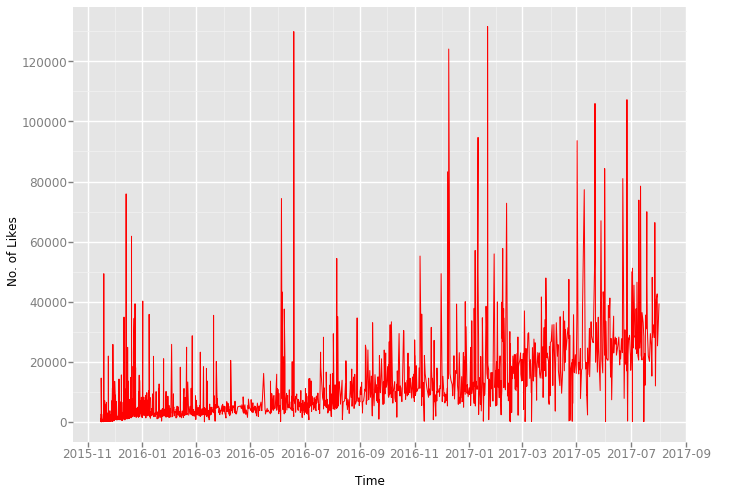

<ggplot: (7555682003)>

In [379]:
ggplot(aes(x ='timestamp', y = 'favorite_count'), data = new_twitter_archive_clean) + geom_line(color = 'red') + \
xlab('Time') + ylab('No. of Likes') 


#### 2. Trends of retweets on time

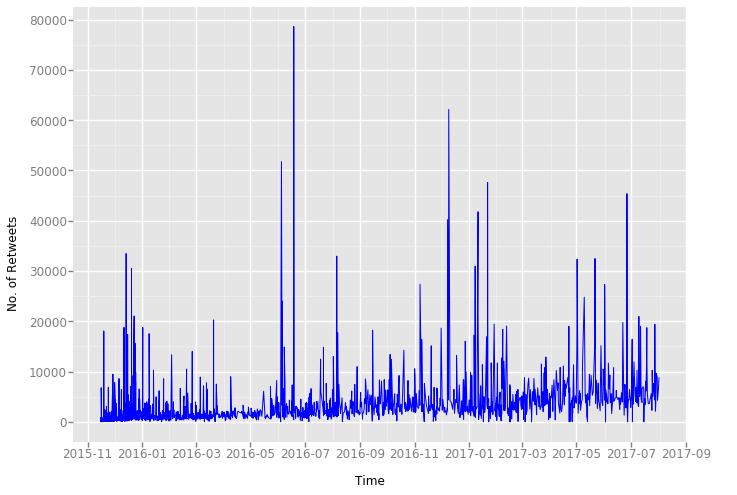

<ggplot: (-9223372029298987190)>

In [380]:
ggplot(aes(x ='timestamp', y = 'retweet_count'), data = new_twitter_archive_clean) + geom_line(color = 'blue') + \
xlab('Time') + ylab('No. of Retweets')